In [1]:
pip show pandas

Name: pandas
Version: 2.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

 Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
 All rights reserved.

 Copyright (c) 2011-2023, Open source contributors.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contribut

In [2]:
import pandas as pd
df = pd.read_csv('telecom_data.csv')
df.head(10)

,Age,Gender,PlanType,MonthlyUsage,Churn
0,21,Female,Regular,15,No
1,45,Female,Economy,41,No
2,44,Female,Economy,40,No
3,31,Female,Regular,23,Yes
4,33,Female,Regular,12,No
5,42,Female,Regular,52,No
6,20,Female,Ultra,57,Yes
7,26,Male,Ultra,23,No
8,37,Female,Advanced,31,No
9,26,Male,Economy,23,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           150 non-null    int64 
 1   Gender        150 non-null    object
 2   PlanType      150 non-null    object
 3   MonthlyUsage  150 non-null    int64 
 4   Churn         150 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.0+ KB


In [4]:
df.describe()

,Age,MonthlyUsage
count,150.000000,150.000000
mean,35.193333,33.693333
std,10.841566,15.923031
min,19.000000,3.000000
25%,25.000000,23.000000
50%,35.000000,35.000000
75%,44.000000,50.000000
max,54.000000,59.000000


In [5]:
df.shape

(150, 5)

In [6]:
df.isnull().sum()

Age             0
Gender          0
PlanType        0
MonthlyUsage    0
Churn           0
dtype: int64

In [7]:
df.dtypes

Age              int64
Gender          object
PlanType        object
MonthlyUsage     int64
Churn           object
dtype: object

In [8]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.793333
Male      0.206667
Name: proportion, dtype: float64

In [9]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.893333
Yes    0.106667
Name: proportion, dtype: float64

In [10]:
df['Age'].value_counts(normalize=True)

Age
45    0.106667
21    0.093333
44    0.093333
42    0.080000
20    0.080000
26    0.073333
37    0.060000
31    0.053333
54    0.046667
53    0.046667
24    0.040000
34    0.033333
35    0.033333
25    0.033333
43    0.026667
33    0.026667
38    0.020000
32    0.020000
19    0.020000
52    0.013333
Name: proportion, dtype: float64

<Axes: >

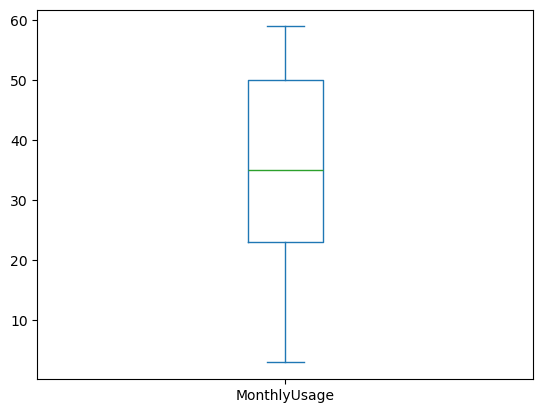

In [11]:
df['MonthlyUsage'].plot(kind='box')

## 33.4.2  Dataset Specification Sheet

| **Field**           | **Details** |
|---------------------|-------------|
| **Dataset Name**    | `telecom_data.csv` (demo dataset) |
| **Description**     | Contains customer behavior data used to demonstrate Data Quality checks including Completeness, Consistency, Accuracy, Bias analysis, and basic feature engineering. |
| **Features**        | `Age`, `Gender`, `Plantype`, `MonthlyUsage` |
| **Target Variable** | *Churn*(Yes=churned) |
| **Number of Rows**  | 150 |
| **Null Handling**   | No missing values detected across any feature |
| **Transformations** | One Hot encoding applied to `categorical data`; datatype validation performed; value distribution and proportion analysis conducted for `gender`, `plantype` |
| **Owner**           | Vedashree |
| **Last Updated**    | 2026-01-09 |

In [12]:
fdata = df.drop(columns = ['Churn'])
x = fdata

In [13]:
y = df['Churn'].map({'Yes':1,'No':0})

In [14]:
categorical = fdata.select_dtypes(include= 'object').columns
numerical = fdata.select_dtypes(exclude= 'object').columns

print("Categorical Features:", list(categorical))
print("Numerical Features:", list(numerical))

Categorical Features: ['Gender', 'PlanType']
Numerical Features: ['Age', 'MonthlyUsage']


In [17]:
x_encoded_gd = pd.get_dummies(
    x,
    columns = categorical,
    drop_first = True
)
print("gd Encoded Columns: ", x_encoded_gd.columns.tolist())

gd Encoded Columns:  ['Age', 'MonthlyUsage', 'Gender_Male', 'PlanType_Economy', 'PlanType_Regular', 'PlanType_Standard', 'PlanType_Ultra']


In [18]:
print(x_encoded_gd.Gender_Male)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Gender_Male, Length: 150, dtype: bool


In [19]:
print(x_encoded_gd.PlanType_Economy)

0      False
1       True
2       True
3      False
4      False
       ...  
145    False
146    False
147    False
148     True
149    False
Name: PlanType_Economy, Length: 150, dtype: bool


In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ohe = OneHotEncoder(
    drop = 'first',
    sparse_output = False
)
encoded_array = ohe.fit_transform(x[categorical])
print(encoded_array)

encoded_df = pd.DataFrame(
    encoded_array,
    columns=ohe.get_feature_names_out(categorical)
)
print(encoded_df)

x_encoded_ohe = pd.concat(
    [x[numerical].reset_index(drop = True), encoded_df.reset_index(drop= True)],
    axis = 1
)
print("OHE Encoded Columns :", x_encoded_ohe.columns.tolist())

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0.

In [21]:
scaler = StandardScaler()
x_scaled_gd = x_encoded_gd.copy()
x_scaled_gd[numerical]= scaler.fit_transform(x_scaled_gd[numerical])

x_scaled_ohe = x_encoded_ohe.copy()
x_scaled_ohe[numerical] = scaler.fit_transform(x_scaled_ohe[numerical])

df = pd.DataFrame({
    'Age_ohe': x_scaled_ohe[numerical]['Age'],
    'Age_gd': x_scaled_gd[numerical]['Age'],
    'MonthlyUsage_ohe':x_scaled_ohe[numerical]['MonthlyUsage'],
    'MonthlyUsage_gd':x_scaled_gd[numerical]['MonthlyUsage'],
})
print("Comparison_Table:\n",df)

Comparison_Table:
       Age_ohe    Age_gd  MonthlyUsage_ohe  MonthlyUsage_gd
0   -1.313545 -1.313545         -1.177914        -1.177914
1    0.907574  0.907574          0.460411         0.460411
2    0.815027  0.815027          0.397399         0.397399
3   -0.388079 -0.388079         -0.673814        -0.673814
4   -0.202986 -0.202986         -1.366951        -1.366951
..        ...       ...               ...              ...
145 -1.498638 -1.498638         -1.934064        -1.934064
146  0.629934  0.629934          1.153549         1.153549
147  1.740493  1.740493         -1.682014        -1.682014
148 -1.406091 -1.406091          1.468612         1.468612
149 -0.388079 -0.388079         -0.673814        -0.673814

[150 rows x 4 columns]


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled_ohe,
    y,
    test_size = 0.20,
    random_state = 42,
    stratify = y
)
pd.DataFrame({
    "Train":y_train.value_counts(normalize = True),
     "Test":y_test.value_counts(normalize = True),
})

,Train,Test
Churn,,
0,0.891667,0.9
1,0.108333,0.1
